In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("datasets/data.csv")
df = df.astype({"text": str})
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [6]:
def get_number_of_exclamation(text):
    countExclamation = text.count("!")
    countQuestion = text.count("?")
    return countExclamation + countQuestion

In [7]:
def get_number_of_Cap(text):
    return sum(1 for c in text if c.isupper())

In [8]:
import re
def number_of_all_cap_words(text):
    return len((re.findall(r'\b[A-Z]+(?:\s+[A-Z]+)*\b', text)))

In [9]:
def num_Sentence(text):
    textSentences = re.split(r'[.!?]+', text)
    return len(textSentences)-1

In [10]:
def num_num(text):
    sum = 0
    for i in range (len(text)-1):
        if text[i].isdigit() and (not text[i+1].isdigit()):
            sum+=1
    return sum

In [11]:
def have_author(text):
    if text != text:
        return 0
    else:
        return 1

In [12]:
df["Score"] = df['text'].apply(get_sentiment_score)

In [13]:
df["?!"] = df['text'].apply(get_number_of_exclamation)

In [14]:
df["Upper"] = df['text'].apply(get_number_of_Cap)

In [15]:
df["num_sentence"] = df['text'].apply(num_Sentence)

In [16]:
df["num_num"] = df['text'].apply(num_num)

In [17]:
df["have_author"] = df['author'].apply(have_author)

In [18]:
df["CAP"]=df['text'].apply(number_of_all_cap_words)

In [19]:
df.head(5)

,id,title,author,text,label,Score,?!,Upper,num_sentence,num_num,have_author,CAP
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,0.006777,0,210,37,8,1,11
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0.100880,4,105,34,10,1,7
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0.056258,4,226,73,9,1,28
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0.017497,0,130,28,13,1,20
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,-0.012500,0,21,5,3,1,0


In [20]:
data = df.loc[:,['Score','?!','Upper','num_sentence','num_num','have_author','CAP']]
labels = df.loc[:,['label']]

Best K:  17


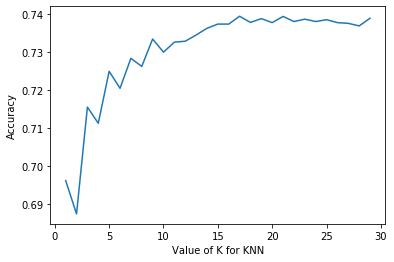

In [21]:
# k range
k_value_range = range(1,30)
# reult score
k_value_scores = []
K = 0
for k in k_value_range:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    accuracy = cross_val_score(knn_model, data, labels.values.ravel(), cv=10, scoring="accuracy")
    #print("K:", k)
    #print("Accuracy: ", accuracy.mean())
    k_value_scores.append(accuracy.mean())
    #print(k_value_scores)
print("Best K: " ,k_value_scores.index(max(k_value_scores))+1)

K = k_value_scores.index(max(k_value_scores))+1

plt.plot(k_value_range, k_value_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, labels.values.ravel(), test_size=0.25, random_state=1)

In [23]:
X_train.head()

,Score,?!,Upper,num_sentence,num_num,have_author,CAP
8202,0.145915,1,176,83,12,1,27
16495,0.165301,6,266,94,5,1,33
790,0.016815,2,86,41,7,1,17
6660,0.038261,5,63,27,4,1,0
11804,-0.058744,0,88,45,28,1,11


In [24]:
X_test.head()

,Score,?!,Upper,num_sentence,num_num,have_author,CAP
17920,0.131130,1,67,58,1,1,2
6863,0.077583,0,88,15,10,1,3
20377,0.083581,2,264,93,20,1,14
5473,0.088470,6,229,98,23,1,8
7102,-0.225000,0,27,6,4,1,3


In [25]:
print(y_train)

[0 0 1 ... 0 0 1]


In [26]:
print(y_test)

[0 1 0 ... 0 0 0]


In [27]:
neigh = KNeighborsClassifier(n_neighbors=K)  
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [28]:
neigh.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

In [29]:
y_expect = y_test
y_predict = neigh.predict(X_test)
(y_expect==y_predict).mean()

0.7413461538461539

In [30]:
print(metrics.classification_report(y_expect,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2568
           1       0.77      0.70      0.73      2632

    accuracy                           0.74      5200
   macro avg       0.74      0.74      0.74      5200
weighted avg       0.74      0.74      0.74      5200

